In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Experiment Description

Bell proposed an experiment that varied slightly from the EPR version. We will start with entangled particles (e.g. $e^-$ and $e^+$ from a $\pi^0$ decay), move them far apart, then measure their spin on _different_ axes. To be consistent with Griffiths, let's say we measure the spin of the electron on axis $\mathbf{a}$ and the spin of the positron on axis $\mathbf{b}$.

We then calculate the average value of the product of the results. Quantum mechanics predicts the average of the product will be 
$$P(\mathbf{a},\mathbf{b})=-\mathbf{a}\cdot\mathbf{b}.$$

At first blush, you might expect that a hidden variable theory could contrive pretty much any average for this product, particularly when $\mathbf{a}\ne\mathbf{b}$. But Bell showed that *any* deterministic theory must obey the famous Bell inequality:
$$|P(\mathbf{a},\mathbf{b})-P(\mathbf{a},\mathbf{c})|\le1+P(\mathbf{b},\mathbf{c})$$


Let's look at this by building a little hidden variable theory of our own. We can make up whatever distribution of measurements we want -- our only rule is that each state must have a defined $a$, $b$, and $c$ value prior to measurement.

To start, let's say that all three axes ($\mathbf{a}, \mathbf{b}, \mathbf{c}$) are completely independent. So whatever we measure along $\mathbf{a}$, we could get $\pm1$ along $\mathbf{b}$ or $\mathbf{c}$. **But** the value is predetermined before we measure along $\mathbf{a}$.

In [45]:
ntrials = 1000
states_a = np.random.choice([-1, 1], size=ntrials)
states_b = np.random.choice([-1, 1], size=ntrials)
states_c = np.random.choice([-1, 1], size=ntrials)

Pab = np.mean(states_a * states_b)
Pac = np.mean(states_a * states_c)
Pbc = np.mean(states_b * states_c)

print(f'|Pab-Pac|={np.abs(Pab - Pac)}')
print(f'1+Pbc={1+Pbc}')

|Pab-Pac|=0.005999999999999998
1+Pbc=0.99


Ok, that is a bit of an easy one. Of course if they're not correlated, the RHS is going to be higher than the LHS. Let's try a tougher one. Let's try to created a "hidden variable" theory that gives the same $P(\mathbf{a},\mathbf{b})$ as quantum mechanics. But here's the catch. If the state is predetermined, I don't get to independently set all three combinations. So let's say I pick $\mathbf{a}$ measurements randomly. Then, I use $P(\mathbf{a},\mathbf{b})$ to pick $\mathbf{b}$ measurements, and finally use $P(\mathbf{a},\mathbf{c})$ to pick $\mathbf{c}$ measurements. At that point all of $\mathbf{a}$, $\mathbf{b}$, and $\mathbf{c}$ are chosen, so $P(\mathbf{b},\mathbf{c})$ is already determined, and we can simply calculate what it is.

Without loss of generality, I will assume $\mathbf{a}$ lies along the x-axis ($\theta_a=0$), and the other angles ($\theta_b, \theta_c$) are defined clockwise relative to $\theta_a$.

In [83]:
def prob(a, theta):
    # Function to calculate probability of the two outcomes
    # given the value along a and the angle between two axes
    if a == -1:
        return [np.sin(theta/2)**2, np.cos(theta/2)**2]
    else:
        return [np.cos(theta/2)**2, np.sin(theta/2)**2]
    
def sim_states(states_a, theta):
    # Simulate a set of states for a second axis, given
    # values for axis a and angle between a and second axis.
    # Uses QM expected distribution.
    return np.array([np.random.choice([-1, 1], size=1, p=prob(a, theta))[0] for a in states_a])

First let's make sure I got that probability function right.

In [84]:
theta_arr = np.arange(0, np.pi, .1)
Ptheta = np.zeros(len(theta_arr))

for i, theta in enumerate(theta_arr):
    states_a = np.random.choice([-1, 1], size=ntrials)
    states_b = sim_states(states_a, theta)
    Ptheta[i] = np.mean(states_a * states_b)

<IPython.core.display.Javascript object>


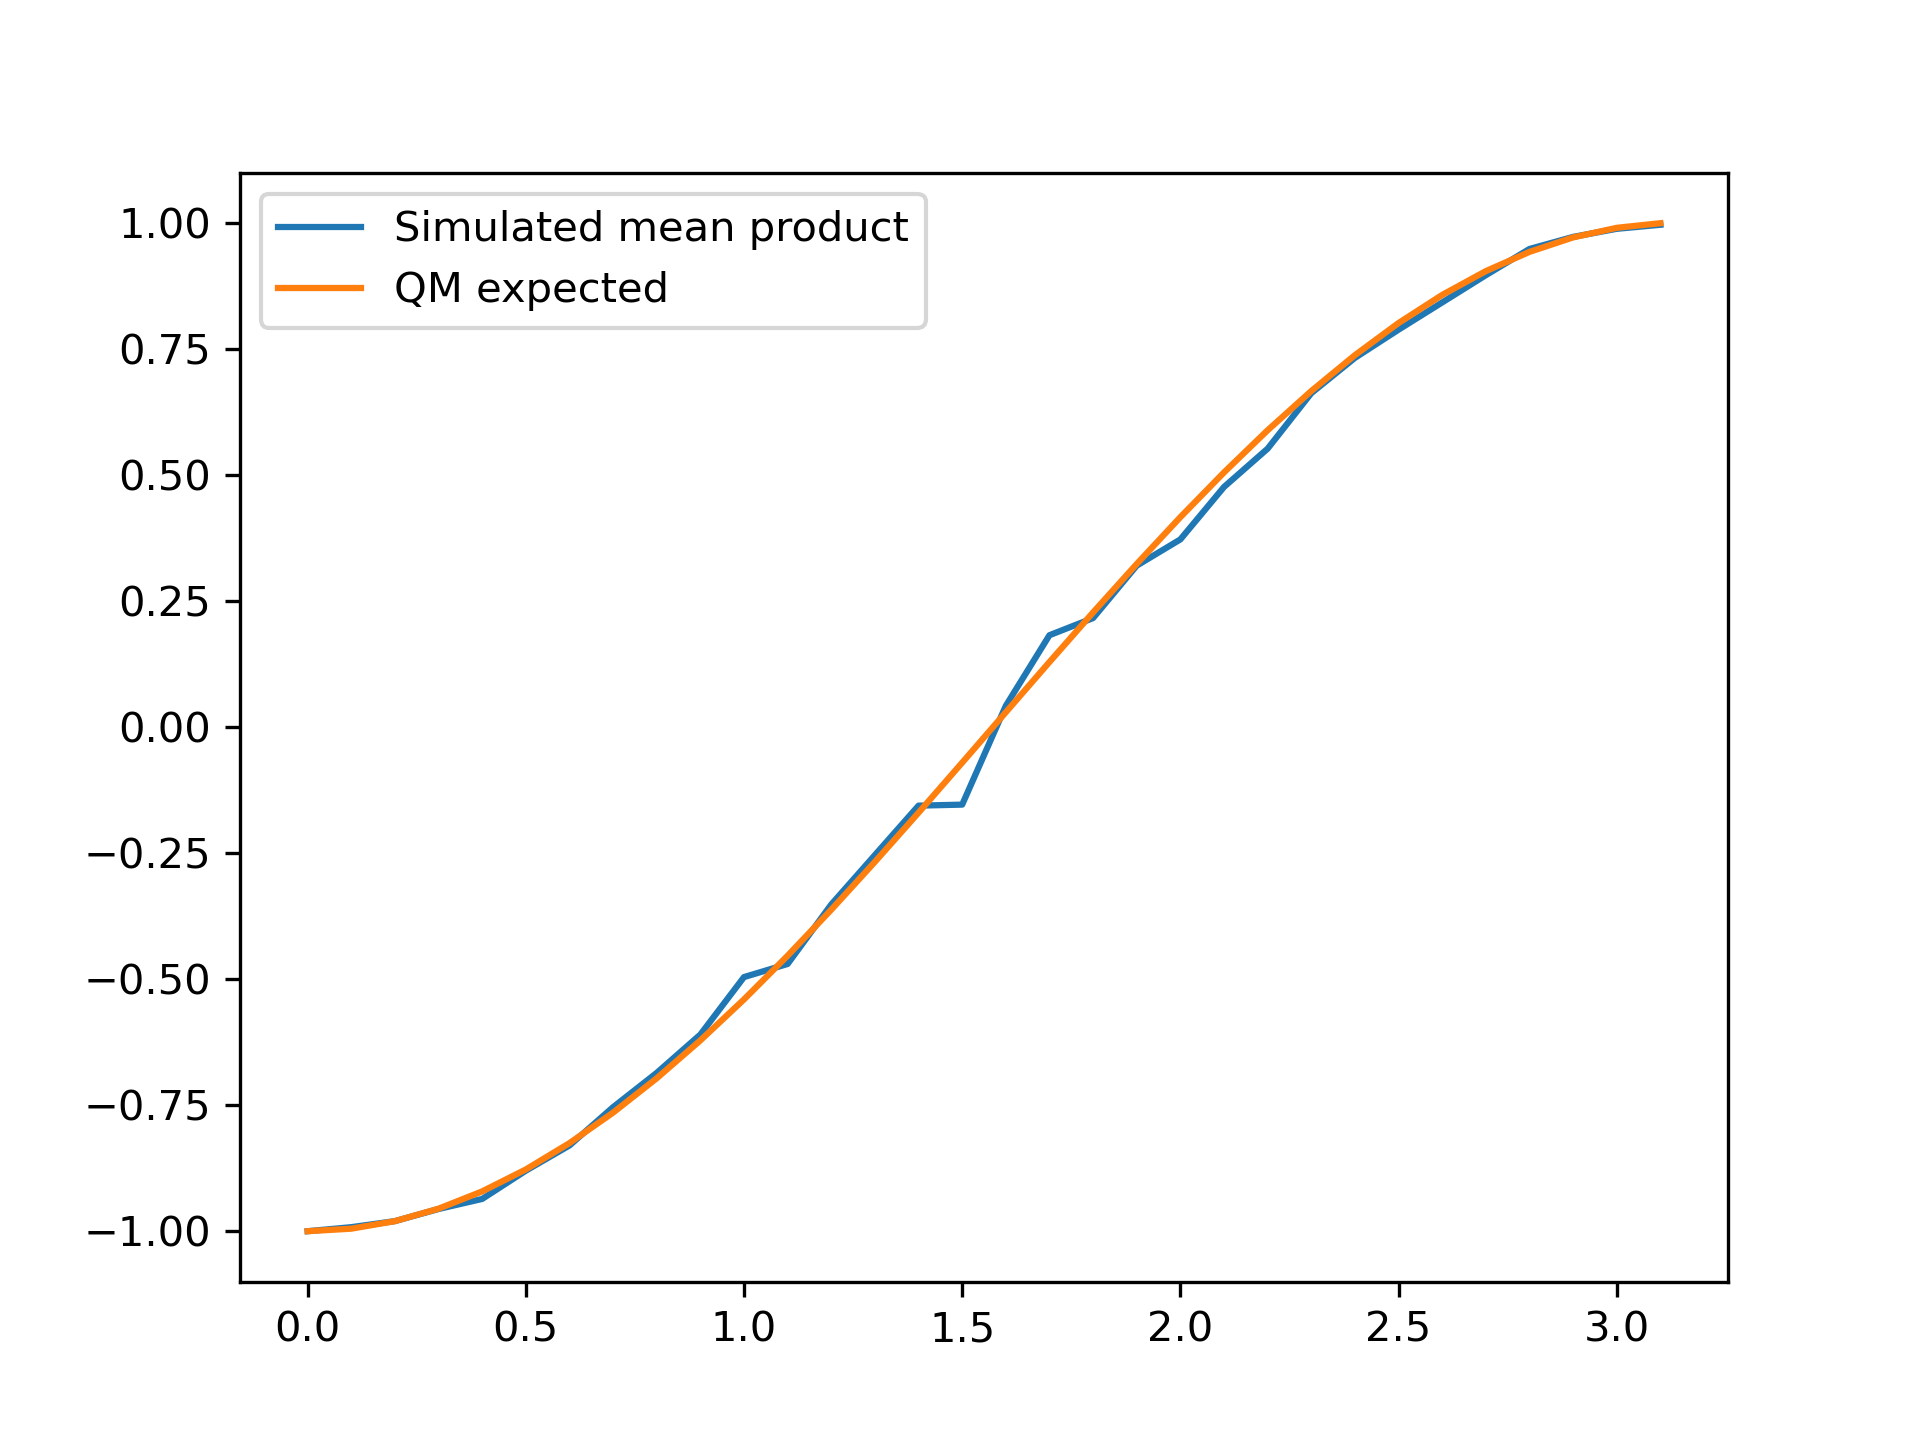

In [85]:
plt.figure()
plt.plot(theta_arr, Ptheta, label='Simulated mean product')
plt.plot(theta_arr, -np.cos(theta_arr), label='QM expected')
plt.legend()

In [92]:
theta_b = np.pi / 2
theta_c = np.pi / 4

states_a = np.random.choice([-1, 1], size=ntrials)
states_b = sim_states(states_a, theta_b)
states_c = sim_states(states_a, theta_c)

Pab = np.mean(states_a * states_b)
Pac = np.mean(states_a * states_c)
Pbc = np.mean(states_b * states_c)

print(f'|Pab-Pac|={np.abs(Pab - Pac)}')
print(f'1+Pbc={1+Pbc}')

|Pab-Pac|=0.714
1+Pbc=0.99


Once again we find Bell's inequality holds.

Feel free to come up with your own "hidden variables" theory! You can choose any distribution you want for a, b, and c. The distributions can even depend on each other. The only rule is that all three values (a, b, and c) must be *determined* before any measurement.

## Quantum measurement

So how is a quantum system different? We used probabilities to create our states above, isn't that quantum? No, because at the end of the day we still had a determined state before any measurements were made. The key to simulating the quantum system is that the spin states of the various axes is not determined until it's measured. And by measuring on spin axis, we will actually alter the spin state of another axis!

We will start with the nice entangled state shown in Griffiths, Eq. 12.1:
$$|\psi\rangle = \frac{1}{\sqrt{2}}\left(|\uparrow\downarrow\rangle-|\downarrow\uparrow\rangle\right)$$

Now, when we make a measurement of the electron, we will collapse the wavefunction, determining the spin of the positron in this basis. But if we measure the spin along a *different* axis, we need to write our state in that basis to determine the probabilities of up/down along the new axis. If our second axis ($b$) makes an angle $\theta$ with the first axis ($a$), we can write our change of basis as:
$$|\uparrow\rangle^a=\cos(\theta/2)|\uparrow\rangle^b+\sin(\theta/2)|\downarrow\rangle^b$$
$$|\downarrow\rangle^a=\sin(\theta/2)|\uparrow\rangle^b-\cos(\theta/2)|\downarrow\rangle^b$$
See problem 4.33 in Griffiths for detail, here I'm just using a simplified expression.

So let's walk through an example measurement. Let's say $b$ makes an angle 45$^\circ$ with $a$. If we measure the electron with spin up ($|\uparrow\rangle^a$), then we know the positron has been compelled to take on the spin down state ($|\downarrow\rangle^a$). In the $b$ basis, this state is $\sin(22.5^\circ)|\uparrow\rangle^b-\cos(22.5^\circ)|\downarrow\rangle^b$. So the probability of measuring spin up in the $b$ basis is $\sin^2(22.5^\circ)=14.6\%$

This is actually pretty wild! And it's arguably a more profound idea than what EPR protested against originally. Originally, we could just say "ok, we know the total spin must be zero, so one is up and one is down. No big deal." But now, we're seeing that the *choice* of measurement axis actually affects the probability outcome! Now we're looking at real spooky action at a distance - our choice of how to measure the electron instantaneously changing the probability outcome for the positron, even if they're lightyears apart!

Let's code this up and see how it looks for Bell's inequality.

In [89]:
theta_b = np.pi / 2
theta_c = np.pi / 4

# This time, we need to do each product mean individually
states_a = np.random.choice([-1, 1], size=ntrials)
states_b = sim_states(states_a, theta_b)
Pab = np.mean(states_a * states_b)

states_a = np.random.choice([-1, 1], size=ntrials)
states_c = sim_states(states_a, theta_c)
Pac = np.mean(states_a * states_c)

states_b = np.random.choice([-1, 1], size=ntrials)
states_c = sim_states(states_b, theta_b - theta_c)
Pbc = np.mean(states_b * states_c)

print(f'|Pab-Pac|={np.abs(Pab - Pac)}')
print(f'1+Pbc={1+Pbc}')

|Pab-Pac|=0.6399999999999999
1+Pbc=0.28600000000000003
